## EjercicioPython_2.
##Israel Nolasco Ortega Domínguez
##2077874
##L-M-V    HORA:N1

#Objetivo.
Comprender los conceptos básicos de las redes neuronales artificiales y su uso en tareas de clasificación de imágenes.
Aprender a utilizar Python y TensorFlow para entrenar una red neuronal artificial.
Entrenar una red neuronal artificial en el conjunto de datos MNIST para clasificar dígitos escritos a mano.
Evaluar el rendimiento del modelo entrenado.

# Instrucciones
 Entrenar una red neuronal artificial en el conjunto de datos MNIST basándose en el ejemplo que se discutió en clase (1).

LIBRERIAS

In [1]:
## Declaracion de librerías a importar desde la nube.
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


DATOS

In [2]:
## Importar y descargar los archivos y datos a utilizar, en este caso el set de daros MNIST
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


CLASIFICACION

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

PRE-PROCESAMIENTO DE DATOS

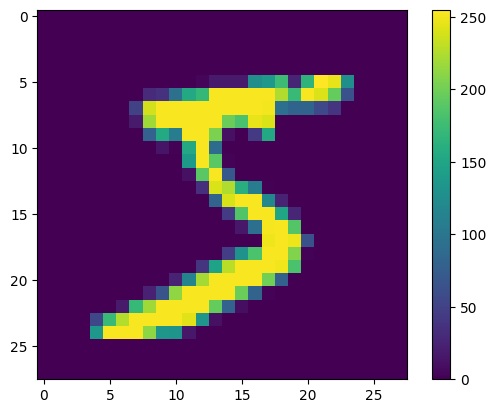

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

NORMALIZACION DE DATOS

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

MUESTRA DE LAS PRIMERAS 25 IMAGENES CON EL FORMATO ADECUADO Y NORMALIZADO

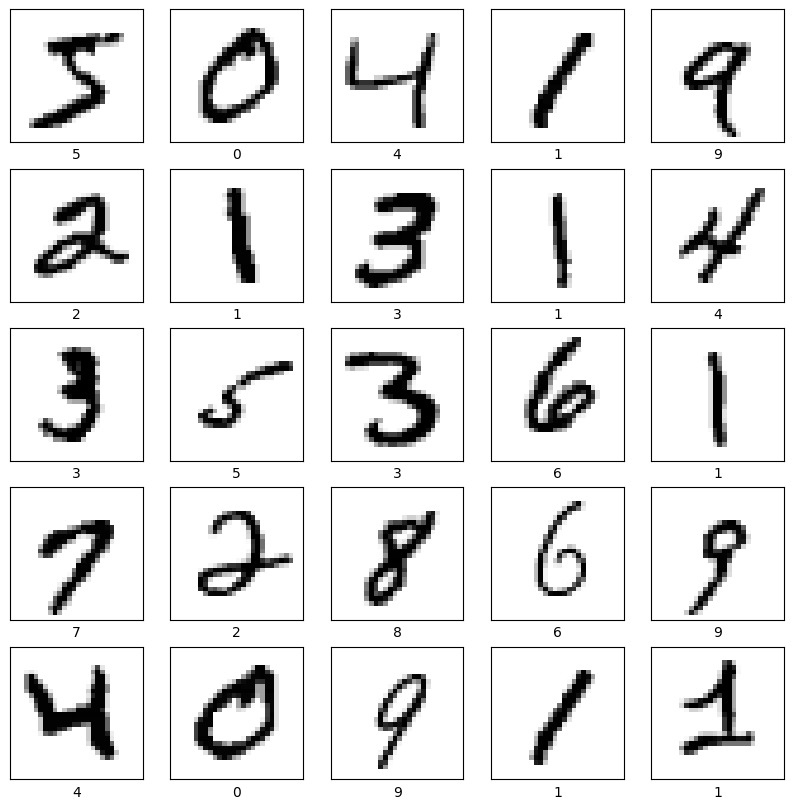

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#CONSTRUCCION DEL MODELO
CONFIGURACION DE CAPAS

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

COMPILAR EL MODELO

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##ENTRENAMIENTO DEL MODELO

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2582 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1114 - accuracy: 0.9679
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0561 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0446 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0264 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0174 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

EVALUAR EXACTITUD

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0792 - accuracy: 0.9786 - 936ms/epoch - 3ms/step

Test accuracy: 0.978600025177002


REALIZAR PREDICCIONES 

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


REVISION DE CONFIANZA DE CADA UNA DE LAS CLASES DE IMAGENES.

In [14]:
np.argmax(predictions[0])

7

EL MODELO CON MAYOR CONFIANZA ES EL 7, ENTONCES EXAMINAMOS Y VERIFICAMOS QUE LA CLASIFICACION SEA LA CORRECTA.

In [15]:
test_labels[0]

7

GRAFICAMOS EL SET DE LAS 10 PREDICIONES REALIZADAS ANTERIORMENTE



In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

FINALMETE GRAFICAREMOS LAS IMAGENES JUTO CON SUS PREDICCIONES, DONDE SE UESTRAN CON AZUL LAS PREDICCIONES CORRECTAS Y CON ROJO LAS INCORRECTAS.

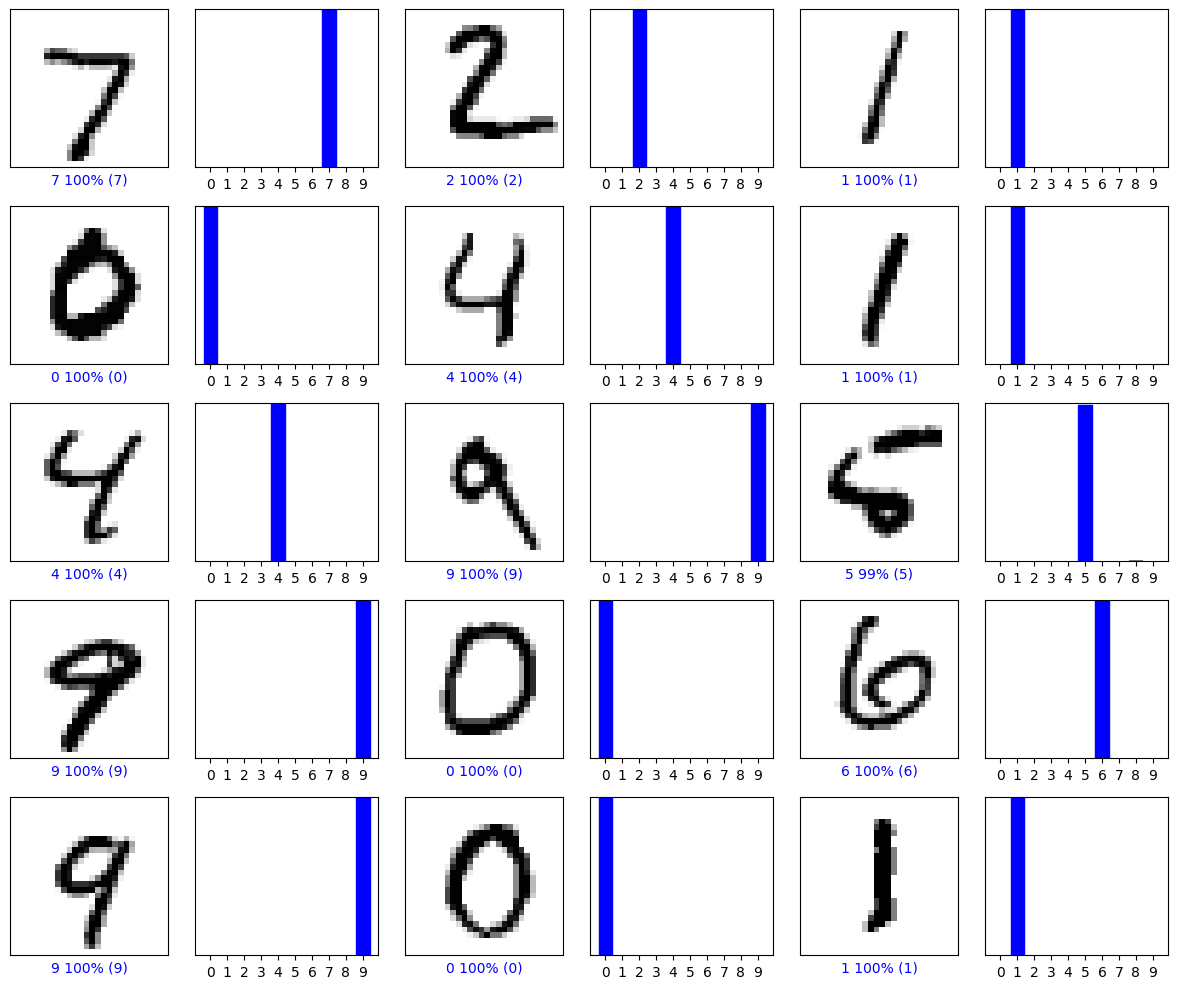

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

FINALMENTE USAREMOS EL MODELO CREADO PARA PODER REALIZAR UNA PREDICCION SOBRES ALGUNA IMAGEN UNICA.

In [48]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


DESPUES LO AGREGAMOS A UNA LISTA

In [49]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


POSTERIORMENTE PREDECIMOS LA ETIQUETA CORRECTA PARA LA IMAGEN ANTERIOR


In [50]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 41ms/step
[[3.1345984e-08 4.3455364e-09 9.9999940e-01 1.4506999e-07 1.3364915e-19
  9.3895231e-08 1.8339603e-10 8.3944756e-16 4.1327735e-07 8.7249116e-16]]


GRAFICAMOS LA PREDICCION

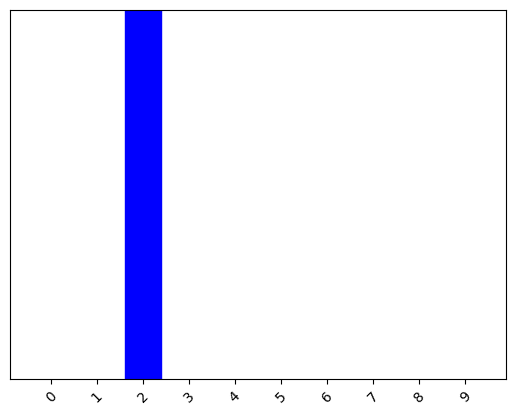

In [51]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

POR ULTIMO MOSTRAMOS LA ETIQUETA DE LA PREDICCION HECHA

In [52]:
np.argmax(predictions_single[0])

2